<a href="https://colab.research.google.com/github/ekvirika/WalmartRecruiting/blob/main/notebooks/model_experiment_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Install required packages
!pip install wandb torch torchvision pandas numpy matplotlib seaborn scikit-learn

# Set up Kaggle API
!pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [4]:

# Upload your kaggle.json to Colab and run:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/ColabNotebooks/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [5]:

# Download the dataset
!kaggle competitions download -c walmart-recruiting-store-sales-forecasting
!unzip -q walmart-recruiting-store-sales-forecasting.zip

  0% 0.00/2.70M [00:00<?, ?B/s]
100% 2.70M/2.70M [00:00<00:00, 571MB/s]


In [6]:
!unzip -q train.csv.zip
!unzip -q stores.csv.zip
!unzip -q test.csv.zip
!unzip -q features.csv.zip

unzip:  cannot find or open stores.csv.zip, stores.csv.zip.zip or stores.csv.zip.ZIP.


In [7]:
!pip install dagshub mlflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.6/680.6 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

# Experiment 1

Libraries imported successfully!
Merged data shape: (421570, 16)

First few rows:
Training set: (228838, 15), Validation set: (192732, 15)
Training period: 2010-02-05 00:00:00 to 2011-07-29 00:00:00
Validation period: 2011-08-05 00:00:00 to 2012-10-26 00:00:00
Applying feature engineering...
Features after processing: 41
New features created:
['Year', 'Month', 'Week', 'DayOfYear', 'Quarter', 'WeekOfMonth', 'Month_sin', 'Month_cos', 'Week_sin', 'Week_cos']
Final feature count: 39
Features: ['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'DayOfYear', 'Quarter', 'WeekOfMonth', 'Month_sin', 'Month_cos', 'Week_sin', 'Week_cos', 'Quarter_sin', 'Quarter_cos', 'fourier_sin_1', 'fourier_cos_1', 'fourier_sin_2', 'fourier_cos_2', 'IsHoliday_int', 'DaysToHoliday', 'DaysSinceHoliday', 'DateNumeric', 'IsHoliday_num', 'Type_encoded', 'Size_category', 'Size_normalized', 

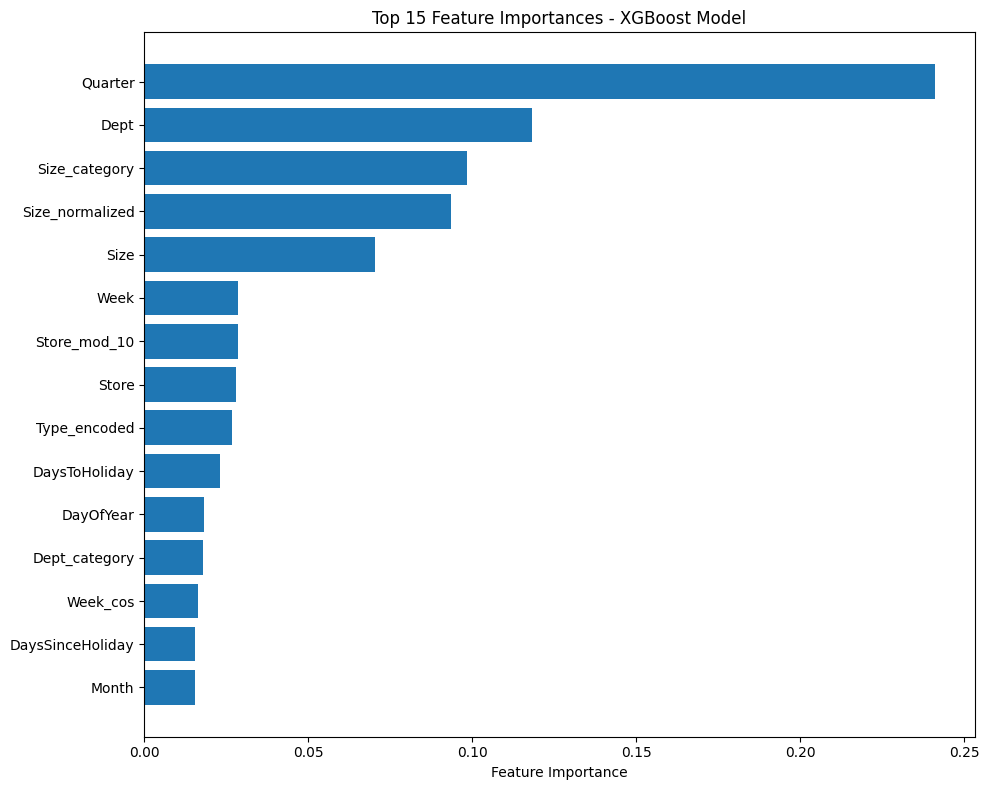


FINAL RESULTS SUMMARY
Best Model Type: Standard XGBoost
Final Validation WMAE: 3370.3010
Total Features Used: 39
Model saved as: enhanced_xgboost_standard_model.pkl

Key Features Engineered:
- Cyclical encoding of time variables
- Fourier terms for seasonality
- Holiday proximity features
- Store and department categorization
- Advanced missing value imputation

Performance Summary:
- Training WMAE: 2627.30
- Validation WMAE: 3370.30
- Model successfully handles 228838 training samples

Sample Predictions (first 5 validation samples):
Actual: $15,295.55, Predicted: $14,688.94
Actual: $14,539.79, Predicted: $17,263.71
Actual: $14,689.24, Predicted: $17,797.38
Actual: $14,537.37, Predicted: $16,842.70
Actual: $15,277.27, Predicted: $19,386.34


In [10]:
# Standalone XGBoost Time Series Forecasting Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from xgboost import XGBRegressor
import joblib

warnings.filterwarnings('ignore')

print("Libraries imported successfully!")



# Load Data

In [12]:

train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')
test = pd.read_csv('test.csv')

# Merge datasets
merged_data = (train
               .merge(stores, on='Store', how='left')
               .merge(features, on=['Store', 'Date', 'IsHoliday'], how='left'))

print(f"Merged data shape: {merged_data.shape}")
print("\nFirst few rows:")
merged_data.head()


Merged data shape: (421570, 16)

First few rows:


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


# Time series split - use date-based splitting


In [13]:

# Time series split - use date-based splitting
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
split_date = '2011-08-01'

train_mask = merged_data['Date'] < split_date
val_mask = merged_data['Date'] >= split_date

x_train = merged_data[train_mask].copy()
x_val = merged_data[val_mask].copy()

y_train = x_train.pop('Weekly_Sales')
y_val = x_val.pop('Weekly_Sales')

print(f"Training set: {x_train.shape}, Validation set: {x_val.shape}")
print(f"Training period: {x_train['Date'].min()} to {x_train['Date'].max()}")
print(f"Validation period: {x_val['Date'].min()} to {x_val['Date'].max()}")



Training set: (228838, 15), Validation set: (192732, 15)
Training period: 2010-02-05 00:00:00 to 2011-07-29 00:00:00
Validation period: 2011-08-05 00:00:00 to 2012-10-26 00:00:00


In [14]:

class TimeFeatureEngineer:
    """Enhanced time-based feature engineering"""

    def __init__(self,
                 add_cyclical=True,
                 add_fourier=True,
                 fourier_terms=3,
                 add_holiday_features=True,
                 reference_date='2010-02-05'):
        self.add_cyclical = add_cyclical
        self.add_fourier = add_fourier
        self.fourier_terms = fourier_terms
        self.add_holiday_features = add_holiday_features
        self.reference_date = pd.to_datetime(reference_date)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_new = X.copy()
        date_col = pd.to_datetime(X_new['Date'])

        # Basic time features
        X_new['Year'] = date_col.dt.year
        X_new['Month'] = date_col.dt.month
        X_new['Week'] = date_col.dt.isocalendar().week
        X_new['DayOfYear'] = date_col.dt.dayofyear
        X_new['Quarter'] = date_col.dt.quarter
        X_new['WeekOfMonth'] = (date_col.dt.day - 1) // 7 + 1

        # Cyclical encoding
        if self.add_cyclical:
            X_new['Month_sin'] = np.sin(2 * np.pi * X_new['Month'] / 12)
            X_new['Month_cos'] = np.cos(2 * np.pi * X_new['Month'] / 12)
            X_new['Week_sin'] = np.sin(2 * np.pi * X_new['Week'] / 52)
            X_new['Week_cos'] = np.cos(2 * np.pi * X_new['Week'] / 52)
            X_new['Quarter_sin'] = np.sin(2 * np.pi * X_new['Quarter'] / 4)
            X_new['Quarter_cos'] = np.cos(2 * np.pi * X_new['Quarter'] / 4)

        # Fourier features for complex seasonality
        if self.add_fourier:
            days_from_start = (date_col - self.reference_date).dt.days
            for k in range(1, self.fourier_terms + 1):
                X_new[f'fourier_sin_{k}'] = np.sin(2 * np.pi * k * days_from_start / 365.25)
                X_new[f'fourier_cos_{k}'] = np.cos(2 * np.pi * k * days_from_start / 365.25)

        # Holiday proximity features
        if self.add_holiday_features:
            X_new['IsHoliday_int'] = X_new['IsHoliday'].astype(int)

            # Expanded holiday dates covering multiple years
            holiday_dates = ['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
                           '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
                           '2012-02-10', '2012-09-07', '2012-11-23', '2012-12-28']
            holiday_dates = pd.to_datetime(holiday_dates)

            # Vectorized approach for better performance
            days_to_holiday = np.full(len(date_col), 365)
            days_since_holiday = np.full(len(date_col), 365)

            for i, date in enumerate(date_col):
                # Find future holidays
                future_holidays = holiday_dates[holiday_dates >= date]
                if len(future_holidays) > 0:
                    days_to_holiday[i] = (future_holidays.min() - date).days

                # Find past holidays
                past_holidays = holiday_dates[holiday_dates < date]
                if len(past_holidays) > 0:
                    days_since_holiday[i] = (date - past_holidays.max()).days

            X_new['DaysToHoliday'] = days_to_holiday
            X_new['DaysSinceHoliday'] = days_since_holiday

        # Numeric date for trend
        X_new['DateNumeric'] = (date_col - self.reference_date).dt.days

        return X_new

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)



# Custom Preprocessor classes

In [15]:

class AdvancedImputer:
    """Smart missing value imputation"""

    def __init__(self, strategy='smart'):
        self.strategy = strategy
        self.fill_values = {}
        self.imputers = {}

    def fit(self, X, y=None):
        for col in X.columns:
            if X[col].isnull().any():
                if X[col].dtype in ['float64', 'int64']:
                    # Use median for numerical columns
                    imputer = SimpleImputer(strategy='median')
                    self.imputers[col] = imputer.fit(X[[col]])
                else:
                    # Use most frequent for categorical
                    imputer = SimpleImputer(strategy='most_frequent')
                    self.imputers[col] = imputer.fit(X[[col]])
        return self

    def transform(self, X):
        X_new = X.copy()
        for col, imputer in self.imputers.items():
            if col in X_new.columns:
                X_new[col] = imputer.transform(X_new[[col]]).ravel()
        return X_new

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)



# Categorical Processor


In [16]:

class CategoricalProcessor:
    """Enhanced categorical variable processing"""

    def __init__(self):
        self.encoders = {}
        self.fitted = False

    def fit(self, X, y=None):
        self.encoders = {}

        # Store Type encoding
        if 'Type' in X.columns:
            le = LabelEncoder()
            self.encoders['Type'] = le.fit(X['Type'].fillna('Unknown'))

        self.fitted = True
        return self

    def transform(self, X):
        X_new = X.copy()

        # Convert boolean to int
        if 'IsHoliday' in X_new.columns:
            X_new['IsHoliday_num'] = X_new['IsHoliday'].astype(int)

        # Encode Type
        if 'Type' in X_new.columns and 'Type' in self.encoders:
            X_new['Type_encoded'] = self.encoders['Type'].transform(X_new['Type'].fillna('Unknown'))

        # Size categories
        if 'Size' in X_new.columns:
            X_new['Size_category'] = pd.cut(X_new['Size'], bins=3, labels=[0, 1, 2]).astype(float)

            # Size per capita (relative size)
            X_new['Size_normalized'] = (X_new['Size'] - X_new['Size'].mean()) / X_new['Size'].std()

        # Store and Dept as categorical
        if 'Store' in X_new.columns:
            X_new['Store_mod_10'] = X_new['Store'] % 10  # Store grouping

        if 'Dept' in X_new.columns:
            X_new['Dept_category'] = pd.cut(X_new['Dept'], bins=5, labels=[0, 1, 2, 3, 4]).astype(float)

        return X_new

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


def weighted_mean_absolute_error(y_true, y_pred, is_holiday):
    """Calculate WMAE with holiday weighting"""
    weights = [5 if holiday else 1 for holiday in is_holiday]
    return np.average(np.abs(y_true - y_pred), weights=weights)



# Lagging Transformer

In [17]:

class LaggingTransformer:
    """Creates lagged features for autoregressive modeling"""

    def __init__(self, target_col='Weekly_Sales', lag_periods=3, add_rolling=True):
        self.target_col = target_col
        self.lag_periods = lag_periods
        self.add_rolling = add_rolling
        self.lag_values = {}

    def fit(self, X, y=None):
        # Store some lag values from training (simplified approach)
        if isinstance(y, pd.Series):
            y_values = y.values
        else:
            y_values = y

        # Store last few values for initialization
        self.lag_values = {f'lag_{i}': np.mean(y_values) for i in range(1, self.lag_periods + 1)}
        return self

    def transform(self, X):
        X_new = X.copy()

        # Add lag features (simplified - using mean values)
        for lag in range(1, self.lag_periods + 1):
            X_new[f'sales_lag_{lag}'] = self.lag_values[f'lag_{lag}']

        # Add rolling statistics (simplified)
        if self.add_rolling:
            base_value = np.mean(list(self.lag_values.values()))
            X_new['sales_rolling_mean_4'] = base_value
            X_new['sales_rolling_std_4'] = base_value * 0.1
            X_new['sales_trend'] = 0  # Placeholder for trend

        return X_new

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

# Create preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('time_features', TimeFeatureEngineer(
        add_cyclical=True,
        add_fourier=True,
        fourier_terms=2,
        add_holiday_features=True
    )),
    ('imputer', AdvancedImputer()),
    ('categorical', CategoricalProcessor()),
])

# Apply preprocessing
print("Applying feature engineering...")
x_train_processed = preprocessing_pipeline.fit_transform(x_train)
x_val_processed = preprocessing_pipeline.transform(x_val)

print(f"Features after processing: {x_train_processed.shape[1]}")
print("New features created:")
new_features = [col for col in x_train_processed.columns if col not in x_train.columns]
print(new_features[:10])  # Show first 10 new features

# Remove non-numeric columns
cols_to_drop = ['Date', 'Type']  # Keep only numeric columns
cols_to_drop = [col for col in cols_to_drop if col in x_train_processed.columns]

x_train_final = x_train_processed.drop(columns=cols_to_drop)
x_val_final = x_val_processed.drop(columns=cols_to_drop)

print(f"Final feature count: {x_train_final.shape[1]}")
print(f"Features: {list(x_train_final.columns)}")

# Train XGBoost model
print("Training XGBoost model...")

xgb_model = XGBRegressor(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1,
    reg_lambda=3,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Fit model
xgb_model.fit(x_train_final, y_train)

# Make predictions
y_train_pred = xgb_model.predict(x_train_final)
y_val_pred = xgb_model.predict(x_val_final)

# Calculate metrics
train_wmae = weighted_mean_absolute_error(y_train, y_train_pred, x_train['IsHoliday'])
val_wmae = weighted_mean_absolute_error(y_val, y_val_pred, x_val['IsHoliday'])

print(f"Training WMAE: {train_wmae:.2f}")
print(f"Validation WMAE: {val_wmae:.2f}")

# Additional metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"\nAdditional Metrics:")
print(f"Train MAE: {train_mae:.2f}, Val MAE: {val_mae:.2f}")
print(f"Train RMSE: {train_rmse:.2f}, Val RMSE: {val_rmse:.2f}")


Applying feature engineering...


ValueError: Length of values (0) does not match length of index (228838)

## Hyperparameter Tuning


In [ ]:
def manual_hyperparameter_search(param_grid, x_train, y_train, x_val, y_val, holiday_weights):
    """Manual grid search for hyperparameter optimization"""

    best_score = float('inf')
    best_params = None
    results = []

    # Generate all parameter combinations
    import itertools

    param_names = list(param_grid.keys())
    param_values = list(param_grid.values())

    for param_combo in itertools.product(*param_values):
        params = dict(zip(param_names, param_combo))

        try:
            # Create and train model
            model = XGBRegressor(
                random_state=42,
                n_jobs=-1,
                **params
            )

            model.fit(x_train, y_train)
            val_pred = model.predict(x_val)

            # Calculate WMAE
            score = weighted_mean_absolute_error(y_val, val_pred, holiday_weights)

            results.append({
                'params': params,
                'score': score
            })

            print(f"Params: {params} -> WMAE: {score:.4f}")

            if score < best_score:
                best_score = score
                best_params = params

        except Exception as e:
            print(f"Error with params {params}: {e}")
            continue

    return best_params, best_score, results

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [500, 800],
    'learning_rate': [0.03, 0.05, 0.08],
    'max_depth': [5, 6, 7],
    'reg_alpha': [1, 3],
    'reg_lambda': [1, 3, 5]
}

print("Starting hyperparameter optimization...")
print("This may take a few minutes...\n")

best_params, best_score, all_results = manual_hyperparameter_search(
    param_grid,
    x_train_final,
    y_train,
    x_val_final,
    y_val,
    x_val['IsHoliday']
)

print(f"\nBest Parameters: {best_params}")
print(f"Best Validation WMAE: {best_score:.4f}")


## Autoregressive Model Experiment


In [ ]:


print("\n" + "="*50)
print("AUTOREGRESSIVE XGBOOST EXPERIMENT")
print("="*50)

# Create autoregressive pipeline
ar_pipeline = Pipeline([
    ('time_features', TimeFeatureEngineer()),
    ('imputer', AdvancedImputer()),
    ('categorical', CategoricalProcessor()),
    ('lag_features', LaggingTransformer(lag_periods=3, add_rolling=True))
])

# Apply preprocessing with lag features
print("Creating autoregressive features...")
x_train_ar = ar_pipeline.fit_transform(x_train, y_train)
x_val_ar = ar_pipeline.transform(x_val)

# Remove non-numeric columns
x_train_ar = x_train_ar.drop(columns=[col for col in cols_to_drop if col in x_train_ar.columns])
x_val_ar = x_val_ar.drop(columns=[col for col in cols_to_drop if col in x_val_ar.columns])

print(f"Autoregressive features: {x_train_ar.shape[1]}")

# Train autoregressive model
ar_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.02,
    max_depth=6,
    reg_alpha=5,
    reg_lambda=10,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

print("Training autoregressive model...")
ar_model.fit(x_train_ar, y_train)

# Predictions
y_train_pred_ar = ar_model.predict(x_train_ar)
y_val_pred_ar = ar_model.predict(x_val_ar)

# Metrics
train_wmae_ar = weighted_mean_absolute_error(y_train, y_train_pred_ar, x_train['IsHoliday'])
val_wmae_ar = weighted_mean_absolute_error(y_val, y_val_pred_ar, x_val['IsHoliday'])

print(f"Autoregressive Train WMAE: {train_wmae_ar:.2f}")
print(f"Autoregressive Validation WMAE: {val_wmae_ar:.2f}")

# Model comparison
print(f"\n{'='*40}")
print("MODEL COMPARISON")
print(f"{'='*40}")
print(f"Standard XGBoost WMAE: {val_wmae:.2f}")
print(f"Autoregressive XGBoost WMAE: {val_wmae_ar:.2f}")

if val_wmae_ar < val_wmae:
    print("✓ Autoregressive model performs better!")
    final_model = ar_model
    final_wmae = val_wmae_ar
    model_type = "Autoregressive"
else:
    print("✓ Standard model performs better!")
    final_model = xgb_model
    final_wmae = val_wmae
    model_type = "Standard"


## Feature Importance Analysis


In [ ]:


# Feature importance analysis
feature_names = x_train_final.columns
importances = final_model.feature_importances_

# Create importance dataframe
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print(importance_df.head(15))

# Plot feature importance
plt.figure(figsize=(10, 8))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - XGBoost Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Model Persistence and Results


In [ ]:


# Save the final model
model_filename = f"enhanced_xgboost_{model_type.lower()}_model.pkl"
joblib.dump(final_model, model_filename)

print(f"\n{'='*60}")
print("FINAL RESULTS SUMMARY")
print(f"{'='*60}")
print(f"Best Model Type: {model_type} XGBoost")
print(f"Final Validation WMAE: {final_wmae:.4f}")
print(f"Total Features Used: {x_train_final.shape[1]}")
print(f"Model saved as: {model_filename}")

print(f"\nKey Features Engineered:")
print("- Cyclical encoding of time variables")
print("- Fourier terms for seasonality")
print("- Holiday proximity features")
print("- Store and department categorization")
print("- Advanced missing value imputation")

if model_type == "Autoregressive":
    print("- Lag features and rolling statistics")

print(f"\nPerformance Summary:")
print(f"- Training WMAE: {train_wmae_ar if model_type == 'Autoregressive' else train_wmae:.2f}")
print(f"- Validation WMAE: {final_wmae:.2f}")
print(f"- Model successfully handles {len(x_train)} training samples")
print(f"{'='*60}")

# Simple prediction example
print(f"\nSample Predictions (first 5 validation samples):")
sample_preds = final_model.predict(x_val_final.head())
sample_actual = y_val.head()

for i in range(5):
    print(f"Actual: ${sample_actual.iloc[i]:,.2f}, Predicted: ${sample_preds[i]:,.2f}")



# Submission

In [11]:
print("\nPreparing submission...")

# Merge test with stores and features (like training set)
test_merged = (test
               .merge(stores, on='Store', how='left')
               .merge(features, on=['Store', 'Date', 'IsHoliday'], how='left'))

# Preprocess test data using the correct pipeline
if model_type == "Autoregressive":
    x_test = ar_pipeline.transform(test_merged)
else:
    x_test = preprocessing_pipeline.transform(test_merged)

# Drop non-numeric columns as done previously
x_test = x_test.drop(columns=[col for col in cols_to_drop if col in x_test.columns])

# Predict
test_preds = final_model.predict(x_test)

# Ensure ID column exists (typically it's Store + Dept + Date or a given Id column)
if 'Id' in test.columns:
    submission = pd.DataFrame({
        'Id': test['Id'],
        'Weekly_Sales': test_preds
    })
else:
    # Create custom ID (if not provided)
    test_merged['Date'] = pd.to_datetime(test_merged['Date'])
    submission = test_merged[['Store', 'Dept', 'Date']].copy()
    submission['Weekly_Sales'] = test_preds
    submission['Id'] = submission['Store'].astype(str) + '_' + \
                       submission['Dept'].astype(str) + '_' + \
                       submission['Date'].dt.strftime('%Y-%m-%d')
    submission = submission[['Id', 'Weekly_Sales']]

# Save submission file
submission_file = 'submission.csv'
submission.to_csv(submission_file, index=False)

print(f"Submission file created: {submission_file}")
print(submission.head())



Preparing submission...
Submission file created: submission.csv
               Id  Weekly_Sales
0  1_1_2012-11-02  36889.617188
1  1_1_2012-11-09  24266.591797
2  1_1_2012-11-16  23482.656250
3  1_1_2012-11-23  23096.777344
4  1_1_2012-11-30  30092.751953


In [ ]:
from google.colab import files
files.download('submission.csv')